In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

# 读取美国人数据集，shell下载数据
# !curl -0 https://raw.githubusercontent.com/jakevdp/data-CDbirths/
# master/births.csv
births = pd.read_csv(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\data\births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


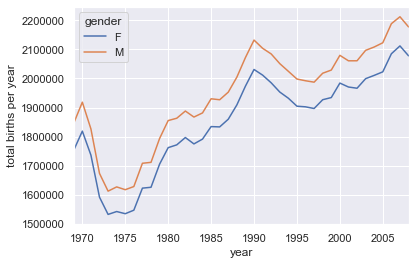

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()   # 使用seaborn风格
births.pivot_table('births', index='year', columns ='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\US-Birthday.jpg")

In [9]:
# 深入探索
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [10]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [11]:
# 将'day'列设置为整数。由于其中含有缺失值null，因此是字符串births['day'] = births['day'].astype(int)
# 从年月日创建一个日期索引
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

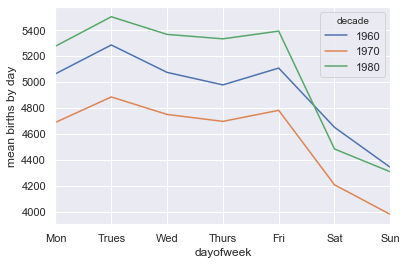

In [14]:
# 用这个索引可以画出不同年代不同星期的日均出生数据，代码如下所示：
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Trues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\births.jpg")

In [15]:
# 另一个有趣的图表是画出各个年份平均每天的出生人数，可以按照月和日两个维度分别对数据进行分组：
births_by_date = births.pivot_table('births', 
                                    [births.index.month, 
                                     births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
# 为了让数据可以用图形表示，我们可以虚构一个年份，与月和日组合成新索引，代码示例如下：

In [16]:
births_by_date.index = [pd.datetime(2012, month, day) 
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


In [ ]:
# 如果只关心月和日的话，这就是一个可以反映一年中平均每天出生人数的时间序列，用plot方法将数据画成下图的样子，示例代码如下：

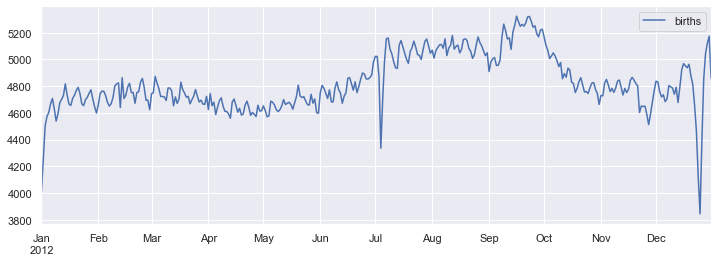

In [19]:
# 将结果画成图
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax=ax);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\births_by_date.jpg")